In [1]:
import pandas as pd
import numpy as np
import joblib
import pickle
import mlflow.sklearn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
!pip install -U imbalanced-learn

In [5]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv( r"C:\Users\axa\THE BRIDGE_23\SEMANA 24. CORE. PROYECTO ML\81. PROYECTO ML\src\data\raw\online_shoppers_intention.csv", sep=",")

# 1) Eliminar la Variable "Month"

En la Fase 2, al implementar el ML: RandomForestClassifier, se hizo el análisis de importancias de las variables, y se valoró eliminar la variable "Month" para reducir el tamaño de las variables con baja importancia.

In [11]:
df1 = df.drop("Month", axis=1)

# 2) Transformar la Variable "VisitorType" de Objeto a Variables Dummies (type:object a dummie)

* Al usar variables dummies, los coeficientes en un modelo (como regresión lineal) se vuelven más interpretables. 
* Cada coeficiente representa el efecto de esa categoría específica en comparación con la categoría de referencia (la original). La eliminación de una columna facilita la interpretación.
* La multicolinealidad se refiere a la correlación alta o perfecta entre dos o más variables predictoras en un modelo estadístico. 
* En el caso de variables dummies, si se tienen múltiples columnas que representan una característica categórica con dos categorías, la presencia de una categoría se puede predecir a partir de la otra. Esto crea multicolinealidad y puede causar problemas en la interpretación y estabilidad del modelo.
* Si no se elimina una de las columnas de las variables ficticias, existe la "trampa de las variables ficticias" (dummy variable trap). Esto significa que las variables predictoras son linealmente dependientes y el modelo no puede identificar coeficientes únicos para cada una. Eliminar una columna resuelve este problema.
* Compatibilidad con Modelos y Bibliotecas

In [12]:
# Transformar la columna "VisitorType" a Dummies y eliminar la primera columna para evitar Multicolinealidad
df1 = pd.get_dummies(df1, columns=['VisitorType'], prefix='VisitorType', drop_first=True)

# 3) Transformar la columna "Weekend" de Boolean a Númerica usando LabelEncoder

* La mayoría de los algoritmos de ML: (regresión, clasificación, clustering y otros), trabajan con variables numéricas. Con variables booleanas en su forma original (True/False o 1/0), los algoritmos pueden funcionar sin problemas.
* Simplifica la preparación de datos y facilita la modelización. Los valores numéricos son más fáciles de analizar y de utilizar en cálculos matemáticos.
* Favorecen la compatibilidad con Bibliotecas y Herramientas: Las bibliotecas de ML (Scikit-Learn en Python), y otras herramientas estadísticas están diseñadas para trabajar con datos numéricos.
* En algunos casos, transformar variables booleanas puede mejorar el rendimiento del modelo. Algunos algoritmos pueden beneficiarse de la representación numérica de las variables booleanas.

In [13]:
le = LabelEncoder()
df1['Weekend'] = le.fit_transform(df1['Weekend'])

# 4) Transformar la Variable "Revenue" de Boolean a Númerica usando LabelEncoder

In [14]:
df1['Revenue'] = le.fit_transform(df1['Revenue'])

# 5) Estandarizar / Escalar / Normalizar las Variable Númericas: 
'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration','ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay','OperatingSystems','Browser', 'Region', 'TrafficType'

* Igualdad de peso: Cuando las variables numéricas tienen diferentes escalas, algunos algoritmos de ML pueden tratar a las variables con valores más grandes como más importantes. Estandarizar las variables garantiza que todas tengan un rango similar, lo que permite que el modelo trate todas las características por igual.
* La estandarización ayuda a que los algoritmos converjan más rápido y alcancen resultados más precisos.
* La estandarización facilita la interpretación de coeficientes en modelos lineales. Los coeficientes estandarizados se pueden comparar directamente para evaluar la importancia relativa de las características.
* Algunos algoritmos numéricos pueden ser propensos a errores numéricos si los datos tienen magnitudes muy diferentes. La estandarización reduce el riesgo de tales errores.
* La estandarización de las variables numéricas es una buena práctica que puede mejorar el rendimiento de los modelos y garantizar resultados más consistentes y significativos en el análisis de datos y ML.
* Al estandarizar con StandardScaler, los datos se centran en cero, lo que significa que la media de las variables escaladas será cero. Esto es útil para algoritmos sensibles a la media, como la regresión lineal. El centrado en cero también facilita la interpretación de los coeficientes en modelos lineales.
* Después de la estandarización, todas las variables tienen una desviación estándar de 1. Esto asegura que todas las variables tengan la misma escala.
* El StandardScaler es adecuado para una amplia variedad de datos, incluidos los datos que se asemejan a una distribución normal, ya que no asume una distribución específica para los datos.
* El StandardScaler es moderadamente robusto ante valores atípicos, (no se verá significativamente afectado por observaciones atípicas). Si los datos contienen valores extremos, esta técnica es efectiva.

In [15]:
variables_numericas = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration','ProductRelated', 'ProductRelated_Duration', 
                       'BounceRates','ExitRates','PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
sc = StandardScaler()
df1[variables_numericas] = sc.fit_transform(df1[variables_numericas])

In [16]:
df1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.233426,-0.790293,-0.894178,-0.762629,0,0,False,True
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-0.136078,-0.207952,-0.894178,-0.514182,0,0,False,True
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2.058618,-0.790293,2.437081,-0.265735,0,0,False,True
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,0.961270,-0.207952,-0.477771,-0.017289,0,0,False,True
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,0.961270,0.374389,-0.894178,-0.017289,1,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,-0.308821,2.058618,2.121412,-0.894178,-0.762629,1,0,False,True
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,-0.308821,0.961270,-0.207952,-0.894178,0.976499,1,0,False,True
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,-0.308821,0.961270,-0.207952,-0.894178,2.218733,1,0,False,True
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,-0.308821,-0.136078,-0.207952,-0.061364,1.721839,0,0,False,True


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  float64
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  float64
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  float64
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  float64
 11  Browser                        12330 non-null  float64
 12  Region                         12330 non-null 

In [18]:
df1.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,12330.000000,12330.000000
mean,-2.996612e-17,6.281359e-17,-4.610172e-18,-2.535595e-17,4.610172e-17,-8.298309e-17,-6.454241e-17,3.688137e-17,1.060340e-16,-5.532206e-17,4.610172e-18,1.498306e-17,7.722038e-17,-2.996612e-17,0.232603,0.154745
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,0.422509,0.361676
min,-6.969930e-01,-4.571914e-01,-3.964779e-01,-2.449305e-01,-7.134884e-01,-6.243475e-01,-4.576830e-01,-8.863706e-01,-3.171778e-01,-3.088214e-01,-1.233426e+00,-7.902929e-01,-8.941785e-01,-7.626290e-01,0.000000,0.000000
25%,-6.969930e-01,-4.571914e-01,-3.964779e-01,-2.449305e-01,-5.560920e-01,-5.281214e-01,-4.576830e-01,-5.923930e-01,-3.171778e-01,-3.088214e-01,-1.360783e-01,-2.079519e-01,-8.941785e-01,-5.141822e-01,0.000000,0.000000
50%,-3.959377e-01,-4.147639e-01,-3.964779e-01,-2.449305e-01,-3.087548e-01,-3.113566e-01,-3.934903e-01,-3.686913e-01,-3.171778e-01,-3.088214e-01,-1.360783e-01,-2.079519e-01,-6.136354e-02,-5.141822e-01,0.000000,0.000000
75%,5.072280e-01,7.035981e-02,-3.964779e-01,-2.449305e-01,1.409492e-01,1.407881e-01,-1.109348e-01,1.425510e-01,-3.171778e-01,-3.088214e-01,9.612698e-01,-2.079519e-01,3.550439e-01,-1.728851e-02,0.000000,0.000000
max,7.431499e+00,1.876956e+01,1.849960e+01,1.786868e+01,1.513858e+01,3.280678e+01,3.667189e+00,3.229316e+00,1.916634e+01,4.718598e+00,6.448010e+00,6.197799e+00,2.437081e+00,3.957861e+00,1.000000,1.000000


In [19]:
ruta_guardado = r"C:\Users\axa\THE BRIDGE_23\SEMANA 24. CORE. PROYECTO ML\81. PROYECTO ML\src\data\processed\df1.csv"
df1.to_csv(ruta_guardado, index=False)
print(f"El archivo CSV se ha guardado en: {ruta_guardado}")

El archivo CSV se ha guardado en: C:\Users\axa\THE BRIDGE_23\SEMANA 24. CORE. PROYECTO ML\81. PROYECTO ML\src\data\processed\df1.csv


# Prueba de Modelos ML (8 Algoritmos diferentes)

## Modelo 1: RandomForestClassifier

* El algoritmo Random Forest Classifier, o "Bosque Aleatorio de Clasificación," funciona de la siguiente manera:
* El algoritmo Random Forest Classifier comienza con un conjunto de datos de entrada que contiene ejemplos de características y etiquetas.
* Se crea un conjunto de datos de entrenamiento mediante el muestreo bootstrap (tomar muestras con reemplazo) del conjunto de datos de entrada. Esto significa que se eligen aleatoriamente ejemplos del conjunto de datos original, y algunos ejemplos pueden aparecer múltiples veces en el conjunto de datos de entrenamiento.
* Luego, se construye un conjunto de árboles de decisión. Cada árbol se entrena utilizando el conjunto de datos de entrenamiento resultante del paso anterior. Estos árboles simples se utilizan para realizar predicciones.
* Cuando se hace una predicción, cada árbol del conjunto emite su predicción. En clasificación, cada árbol vota por una etiqueta de clase. El resultado final es el resultado de la votación por mayoría de todos los árboles.
* Una de las ventajas clave de Random Forest es su capacidad para reducir el sobreajuste (overfitting). Debido al muestreo bootstrap, cada árbol se entrena con un conjunto de datos de entrenamiento ligeramente diferente, lo que hace que los árboles sean diversos. La diversidad de los árboles y la votación por mayoría ayudan a reducir el sobreajuste.
* Random Forest proporciona una medida de la importancia de las características. Es interesante saber cuáles son las características más influyentes en la toma de decisiones del modelo.
* Random Forest tiene varios hiperparámetros, como el número de árboles, la profundidad máxima del árbol, etc. Se podrán ajustar estos hiperparámetros para optimizar el rendimiento del modelo.
* Una vez que el modelo se entrena, se  utiliza para hacer predicciones en nuevos datos y evaluar su rendimiento utilizando métricas adecuadas, como precisión, sensibilidad, especificidad, F1-score, etc.

In [20]:
X = df1.drop('Revenue', axis=1)  
y = df1['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

In [21]:
modeloRFC = RandomForestClassifier(n_estimators=100, class_weight='balanced', max_depth=10, random_state=1)
modeloRFC.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=1)

In [22]:
y_pred = modeloRFC.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, modeloRFC.predict_proba(X_test)[:, 1])
confusionRFC= confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusionRFC.ravel()
specificity = tn / (tn + fp)

print(f'Accuracy modeloRFC: {accuracy}')
print(f'Precision modeloRFC: {precision}')
print(f'Recall modeloRFC: {recall}')
print(f'F1-Score modeloRFC: {f1}')
print(f'AUC-ROC modeloRFC: {roc_auc}')
print('Matriz de Confusión modeloRFC:')
print(confusionRFC)
print("Especificidad modeloRFC:", specificity)

Accuracy modeloRFC: 0.8794268721276021
Precision modeloRFC: 0.5704607046070461
Recall modeloRFC: 0.7654545454545455
F1-Score modeloRFC: 0.6537267080745343
AUC-ROC modeloRFC: 0.9049227749068968
Matriz de Confusión modeloRFC:
[[2832  317]
 [ 129  421]]
Especificidad modeloRFC: 0.899333121625913


In [24]:
feature_importance = modeloRFC.feature_importances_
feature_importance

array([3.20711666e-02, 3.47681672e-02, 1.17039841e-02, 1.68480636e-02,
       5.69627198e-02, 8.64016613e-02, 5.05229187e-02, 1.03039591e-01,
       5.24881875e-01, 8.22102885e-03, 9.23504816e-03, 1.14692146e-02,
       1.51444490e-02, 2.03568408e-02, 5.70259699e-03, 4.26339178e-04,
       1.22443348e-02])

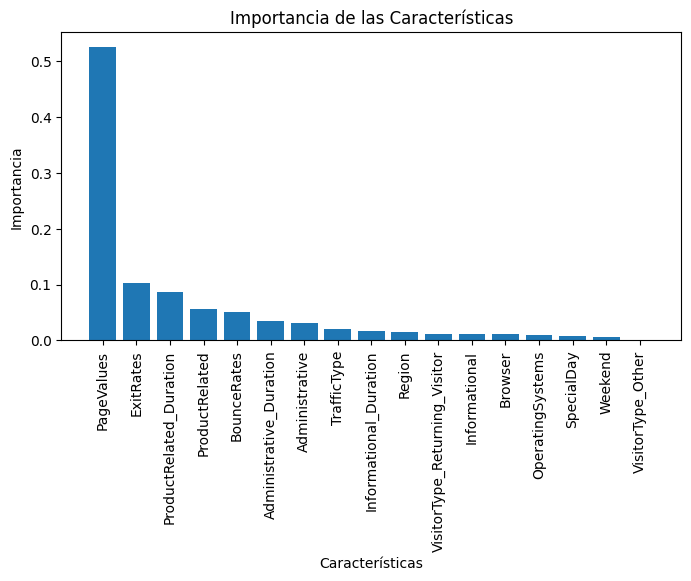

In [25]:
sorted_indices = np.argsort(feature_importance)[::-1]
feature_labels = X.columns
sorted_labels = [feature_labels[i] for i in sorted_indices]
sorted_importance = [feature_importance[i] for i in sorted_indices]

plt.figure(figsize=(8,4))
plt.bar(range(len(sorted_importance)), sorted_importance)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.xticks(range(len(sorted_importance)), sorted_labels, rotation=90)
plt.title('Importancia de las Características')
plt.show()

## Modelo 2: Gradient Boosting Classifier

* El proceso comienza con un conjunto de datos de entrada que contiene ejemplos etiquetados con características. El objetivo es predecir la etiqueta o la clase de un nuevo ejemplo en función de las características.
* En primer lugar, se entrena un modelo base. Esto suele ser un árbol de decisión, aunque también podría ser otro tipo de modelo de clasificación. Este modelo inicial se utiliza como punto de partida.
* Se calculan los residuales o errores del modelo inicial en función de las etiquetas reales. Los residuales representan las diferencias entre las etiquetas reales y las predicciones del modelo inicial. Luego, se calculan los gradientes de los residuales, que indican cómo deben ajustarse las predicciones para reducir el error. En otras palabras, los gradientes representan la dirección y la magnitud en la que debemos mover nuestras predicciones para mejorar el modelo.
* Se entrenan modelos adicionales, que generalmente son árboles de decisión, pero esta vez se centran en predecir los residuales en lugar de las etiquetas originales. Estos modelos adicionales se ajustan para reducir los residuales y, por lo tanto, mejorar la precisión global.
* A medida que se entrenan los modelos adicionales, sus predicciones se combinan con las del modelo inicial y los modelos anteriores. En cada etapa, los modelos calculan predicciones basadas en los residuales de los modelos anteriores y ajustan sus predicciones para reducir aún más el error global.
* Para evitar el sobreajuste, se utilizan técnicas de regularización, como la limitación de la profundidad de los árboles o la introducción de hiperparámetros de regularización.
* El proceso se repite durante un número fijo de iteraciones o hasta que se alcance cierta condición de parada. Cada iteración se centra en mejorar la precisión general del modelo.
* Una vez que se completan todas las iteraciones, el modelo de Gradient Boosting Classifier se utiliza para hacer predicciones en nuevos ejemplos. Estas predicciones son la suma ponderada de las predicciones de todos los modelos individuales.
* El rendimiento del modelo se evalúa utilizando métricas de clasificación, como la precisión, la sensibilidad, la especificidad, el F1-score, etc.
* En resumen, el Gradient Boosting Classifier mejora la precisión del modelo a través de la combinación de múltiples modelos, cada uno de los cuales se enfoca en corregir los errores del modelo anterior. Esto lo convierte en un algoritmo muy efectivo en una amplia gama de problemas de clasificación.

In [26]:
X = df1.drop('Revenue', axis=1)  
y = df1['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

In [27]:
modeloGBC = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=1)
modeloGBC.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [28]:
y_pred = modeloGBC.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, modeloGBC.predict_proba(X_test)[:, 1])
confusionGBC = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusionGBC.ravel()
specificity = tn / (tn + fp)


print(f'Accuracy modeloGBC: {accuracy}')
print(f'Precision modeloGBC: {precision}')
print(f'Recall modeloGBC: {recall}')
print(f'F1-Score modeloGBC: {f1}')
print(f'AUC-ROC modeloGBC: {roc_auc}')
print('Matriz de Confusión modeloGBC:')
print(confusionGBC)
print("Especificidad modeloGBC:", specificity)

Accuracy modeloGBC: 0.8969991889699919
Precision modeloGBC: 0.6898876404494382
Recall modeloGBC: 0.5581818181818182
F1-Score modeloGBC: 0.6170854271356784
AUC-ROC modeloGBC: 0.9082418661046797
Matriz de Confusión modeloGBC:
[[3011  138]
 [ 243  307]]
Especificidad modeloGBC: 0.9561765639885678


## Modelo 3: Ada Boost Classifier

* El proceso comienza con un conjunto de datos de entrada que contiene ejemplos etiquetados con características. Cada ejemplo debe tener una etiqueta de clase que se va a predecir.
* En primer lugar, se entrena un modelo base, que generalmente es un clasificador débil. Un clasificador débil es un modelo que tiene un rendimiento ligeramente mejor que el azar, como un árbol de decisión simple o un clasificador lineal. Este modelo inicial se utiliza como punto de partida.
* Inicialmente, se asigna el mismo peso a todos los ejemplos en el conjunto de datos. Los pesos se utilizan para indicar la importancia de cada ejemplo en el proceso de entrenamiento.
* El proceso de entrenamiento es iterativo y se repite un número fijo de veces o hasta que se alcance cierta condición de parada. En cada iteración, se realiza lo siguiente:
* * a. Se entrena un modelo en función de los pesos actuales de los ejemplos. Este modelo se enfoca en los ejemplos que se clasificaron incorrectamente en las iteraciones anteriores.
* * b. Se calcula el error ponderado del modelo actual en el conjunto de datos. El error ponderado se utiliza para determinar la importancia del modelo en la predicción final.
* * c. Se calcula el peso del modelo actual en función del error ponderado. Los modelos que cometen errores más grandes obtienen menos peso, lo que significa que se les da menos importancia en las predicciones finales.
* * d. Se actualizan los pesos de los ejemplos. Los ejemplos mal clasificados en la iteración actual reciben un mayor peso, lo que los hace más importantes en la siguiente iteración.
* En cada iteración, se asigna un peso al modelo actual, y estos modelos se combinan para formar una predicción final. Los modelos con mayor peso tienen una mayor influencia en la predicción final.
* Una vez completadas todas las iteraciones, el modelo AdaBoost se utiliza para hacer predicciones en nuevos ejemplos. Las predicciones finales son una combinación ponderada de las predicciones de los modelos individuales.
* El rendimiento del modelo se evalúa utilizando métricas de clasificación, como la precisión, la sensibilidad, la especificidad, el F1-score, etc., según el tipo de problema.
* En resumen, AdaBoost es un algoritmo que mejora la precisión del modelo mediante la combinación de múltiples modelos débiles y asignando pesos a los ejemplos en función de su dificultad para clasificarse correctamente. Esto lo convierte en un algoritmo efectivo en una amplia gama de problemas de clasificación.

In [30]:
X = df1.drop('Revenue', axis=1)  
y = df1['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

In [31]:
modeloABC= AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=1)
modeloABC.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=1)

In [32]:
y_pred = modeloABC.predict(X_test)

In [33]:
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)
roc_auc= roc_auc_score(y_test, modeloABC.predict_proba(X_test)[:, 1])
confusionABC= confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusionABC.ravel()
specificity = tn / (tn + fp)

print("Accuracy modeloABC:", accuracy)
print("Precisión modeloABC:", precision)
print("Recall modeloABC:", recall)
print("F1-Score modeloABC:", f1)
print("AUC-ROC modeloABC:", roc_auc)
print("Matriz de Confusión modeloABC:")
print(confusionABC)
print("Especificidad modeloABC:", specificity)

Accuracy modeloABC: 0.8883482022168153
Precisión modeloABC: 0.62756052141527
Recall modeloABC: 0.6127272727272727
F1-Score modeloABC: 0.6200551977920883
AUC-ROC modeloABC: 0.8923011634285054
Matriz de Confusión modeloABC:
[[2949  200]
 [ 213  337]]
Especificidad modeloABC: 0.9364877738964751


## Modelo 4: BalancedRandomForest

* El algoritmo BalancedRandomForest es una variante del algoritmo Random Forest que se utiliza en problemas de clasificación desequilibrados. Su objetivo principal es abordar el problema del desequilibrio de clases que puede ocurrir en conjuntos de datos en los que una clase es significativamente más grande que la otra. A continuación, se explica cómo funciona el BalancedRandomForest:
* Al igual que el algoritmo Random Forest, el proceso comienza con un conjunto de datos de entrada que contiene ejemplos etiquetados con características. El conjunto de datos puede tener clases desequilibradas, lo que significa que una clase tiene muchas más instancias que la otra.
* En lugar de tomar muestras aleatorias directamente del conjunto de datos de entrenamiento, el BalancedRandomForest realiza un muestreo aleatorio estratificado para equilibrar las clases. Esto significa que selecciona una cantidad igual de ejemplos de cada clase para construir cada árbol del bosque. Esto ayuda a prevenir el sesgo hacia la clase mayoritaria que a menudo se produce en el Random Forest tradicional.
* Para cada árbol en el bosque, se construye un árbol de decisión utilizando el conjunto de datos equilibrado. Cada árbol se desarrolla de manera similar a un árbol de decisión estándar.
* Una vez que se han construido todos los árboles, las predicciones se combinan mediante votación o promedio (dependiendo de la configuración) para producir una predicción final. En el caso de la clasificación, el voto de cada árbol se pondera por su precisión.
* El BalancedRandomForest se utiliza para hacer predicciones en nuevos ejemplos. Las predicciones finales son el resultado de la combinación de las predicciones de todos los árboles.
* La principal ventaja del BalancedRandomForest es que ayuda a mejorar el rendimiento en problemas de clasificación con clases desequilibradas. Al equilibrar las clases en el proceso de entrenamiento, el modelo se vuelve más capaz de clasificar correctamente ejemplos de ambas clases. Esto puede ser especialmente útil en aplicaciones donde la clase minoritaria es de particular interés, como la detección de fraudes, problemas médicos, o ratios de compradores on line.

In [34]:
X = df1.drop('Revenue', axis=1)
y = df1['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

In [35]:
modeloBRF = BalancedRandomForestClassifier(n_estimators=100, max_depth=5, class_weight= "balanced", random_state=1)
modeloBRF.fit(X_train, y_train)

BalancedRandomForestClassifier(class_weight='balanced', max_depth=5,
                               random_state=1)

In [36]:
y_pred_BRF = modeloBRF.predict(X_test)

In [37]:
accuracy_BRF = accuracy_score(y_test, y_pred_BRF)
precision_BRF = precision_score(y_test, y_pred_BRF)
recall_BRF = recall_score(y_test, y_pred_BRF)
f1_BRF = f1_score(y_test, y_pred_BRF)
roc_auc_BRF = roc_auc_score(y_test, modeloBRF.predict_proba(X_test)[:, 1])
conf_matrix_BRF = confusion_matrix(y_test, y_pred_BRF)
tn, fp, fn, tp = conf_matrix_BRF.ravel()
specificity = tn / (tn + fp)

print("Accuracy modeloBRF:", accuracy_BRF)
print("Precision modeloBRF:", precision_BRF)
print("Recall modeloBRF:", recall_BRF)
print("F1-score modeloBRF:", f1_BRF)
print("AUC-ROC modeloBRF:", roc_auc_BRF)
print("Matriz de Confusión modeloBRF:")
print(conf_matrix_BRF)
print("Especificidad modeloBRF:", specificity)

Accuracy modeloBRF: 0.46336847796701813
Precision modeloBRF: 0.21402949382223993
Recall modeloBRF: 0.9763636363636363
F1-score modeloBRF: 0.3510951291271657
AUC-ROC modeloBRF: 0.8990536678310576
Matriz de Confusión modeloBRF:
[[1177 1972]
 [  13  537]]
Especificidad modeloBRF: 0.3737694506192442


## Modelo 5: Naive Bayes  Gaussian NB

* El clasificador Gaussian Naive Bayes (Gaussian NB), es un algoritmo de aprendizaje automático que se basa en el teorema de Bayes para realizar tareas de clasificación. El clasificador Gaussian NB es una variante de Naive Bayes que asume que las características siguen una distribución normal (Gaussiana).
* Teorema de Bayes: El algoritmo Naive Bayes se basa en el teorema de Bayes, que es un principio fundamental de la teoría de probabilidad. El teorema de Bayes se utiliza para calcular la probabilidad de que un ejemplo dado pertenezca a una clase específica dadas sus características observadas. 
* El término "Naive" en el nombre se refiere a una suposición clave del algoritmo: asume que las características son independientes entre sí. Esto significa que no se tienen en cuenta las posibles correlaciones o interacciones entre las características. Esta suposición es lo que hace que el algoritmo sea "naive" (ingenuo). A pesar de esta suposición simplificadora, Naive Bayes a menudo funciona sorprendentemente bien en la práctica.
* Gaussian Naive Bayes se utiliza cuando se asume que las características siguen una distribución normal (Gaussiana). Esto significa que el algoritmo modela la probabilidad de observar las características dadas una clase específica como una distribución normal. Para cada característica, el algoritmo calcula la media y la desviación estándar de esa característica para cada clase.
* Durante la fase de entrenamiento, el algoritmo calcula las estadísticas necesarias para modelar las distribuciones de las características en cada clase.
* Una vez que el modelo está entrenado, puede utilizarse para hacer predicciones en nuevos ejemplos. Para una nueva instancia, el algoritmo calcula la probabilidad de que pertenezca a cada clase en función de las distribuciones de las características y utiliza el teorema de Bayes para estimar la probabilidad condicional de pertenencia a cada clase.
* El algoritmo asigna la clase con la probabilidad más alta como la etiqueta de clasificación predicha para el ejemplo.
* El Gaussian Naive Bayes es ampliamente utilizado en aplicaciones de clasificación, especialmente cuando se trabaja con características continuas y se pueden hacer suposiciones sobre la distribución normal de las características. A pesar de su suposición de independencia, Naive Bayes a menudo funciona bien en la práctica. Sin embargo, su rendimiento puede verse afectado si la suposición de independencia no se cumple en el conjunto de datos.

In [38]:
X = df1.drop('Revenue', axis=1)
y = df1['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

In [39]:
modeloNB= GaussianNB()
modeloNB.fit(X_train, y_train)

GaussianNB()

In [40]:
y_pred = modeloNB.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, modeloNB.predict_proba(X_test)[:, 1])
conf_matrixNB = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrixNB.ravel()
specificity = tn / (tn + fp)

print("Accuracy modeloNB:", accuracy)
print("Precision modeloNB:", precision)
print("Recall modeloNB:", recall)
print("F1-score modeloNB:", f1)
print("AUC-ROC modeloNB:", roc_auc)
print("Matriz de Confusión modeloNB:")
print(conf_matrixNB)
print("Especificidad modeloNB:", specificity)

Accuracy modeloNB: 0.818058934847256
Precision modeloNB: 0.42922899884925203
Recall modeloNB: 0.6781818181818182
F1-score modeloNB: 0.5257223396758282
AUC-ROC modeloNB: 0.8356707757152342
Matriz de Confusión modeloNB:
[[2653  496]
 [ 177  373]]
Especificidad modeloNB: 0.8424896792632581


## Modelo 6: SVC

* El modelo de Máquinas de Vectores de Soporte (SVM, Support Vector Machine) es un algoritmo de aprendizaje supervisado. La idea principal detrás del SVM es encontrar un hiperplano que separe los datos en clases de manera óptima. El hiperplano óptimo es aquel que maximiza la distancia entre los puntos de datos más cercanos de las diferentes clases, a los que se llaman vectores de soporte. Estos vectores de soporte definen el margen de separación entre las clases.
* Comienza con un conjunto de datos etiquetado que consiste en ejemplos de diferentes clases. Cada ejemplo se representa mediante un conjunto de características.
* El objetivo es encontrar un hiperplano (una línea en problemas 2D, un plano en problemas 3D) que separe los ejemplos de diferentes clases de la mejor manera posible, maximizando el margen de separación.
* El algoritmo SVM busca el hiperplano óptimo durante el entrenamiento. Para ello, se utiliza una función de costo que penaliza las clasificaciones incorrectas y busca maximizar el margen entre las clases. La optimización se realiza mediante técnicas de programación cuadrática.
* Una vez que se ha entrenado el modelo SVC, se puede utilizar para predecir las clases de nuevos ejemplos. El modelo asigna a un ejemplo una etiqueta según el lado del hiperplano en el que se encuentra.
* En casos donde los datos no son linealmente separables en su espacio de características original, se pueden aplicar transformaciones no lineales a los datos. Esto se logra mediante una técnica llamada "kernel trick", que permite mapear los datos a un espacio de características de mayor dimensión donde puedan ser separados por un hiperplano. Los núcleos (kernels) más comunes son el kernel lineal, el kernel polinómico y el kernel radial (RBF).
* El parámetro de regularización (C) se utiliza para controlar el equilibrio entre maximizar el margen y minimizar las clasificaciones incorrectas. Un valor más alto de C permite un margen más estrecho y clasificaciones incorrectas permitidas, mientras que un valor más bajo busca un margen más amplio con menos clasificaciones incorrectas.
* El modelo SVM es ampliamente utilizado en aplicaciones de clasificación, especialmente en situaciones en las que es importante maximizar el margen entre las clases y generalizar bien a datos no vistos. Puede ser eficaz en problemas de clasificación binaria y multiclase, y es particularmente útil cuando se dispone de datos de alta dimensión. Además, los núcleos (kernels) permiten adaptar el modelo a problemas no lineales de manera efectiva.

In [42]:
X = df1.drop('Revenue', axis=1)
y = df1['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

In [43]:
modeloSVC = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', random_state=1)
modeloSVC.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=1)

In [44]:
y_pred_SVC = modeloSVC.predict(X_test)

In [45]:
accuracy_SVC = accuracy_score(y_test, y_pred_SVC)
precision_SVC = precision_score(y_test, y_pred_SVC)
recall_SVC = recall_score(y_test, y_pred_SVC)
f1_SVC = f1_score(y_test, y_pred_SVC)
roc_auc_SVC = roc_auc_score(y_test, modeloSVC.decision_function(X_test))
conf_matrix_SVC = confusion_matrix(y_test, y_pred_SVC)
tn, fp, fn, tp = conf_matrix_SVC.ravel()
specificity = tn / (tn + fp)

print("Accuracy modeloSVC:", accuracy_SVC)
print("Precision modeloSVC:", precision_SVC)
print("Recall modeloSVC:", recall_SVC)
print("F1-score modeloSVC:", f1_SVC)
print("AUC-ROC modeloSVC:", roc_auc_SVC)
print("Matriz de Confusión modeloSVC:")
print(conf_matrix_SVC)
print("Especificidad modeloSVC:", specificity)

Accuracy modeloSVC: 0.8667207353338741
Precision modeloSVC: 0.5375494071146245
Recall modeloSVC: 0.7418181818181818
F1-score modeloSVC: 0.6233766233766234
AUC-ROC modeloSVC: 0.8896451976096308
Matriz de Confusión modeloSVC:
[[2798  351]
 [ 142  408]]
Especificidad modeloSVC: 0.8885360431883137


## Modelo 7: Logistic Regression

* La Regresión Logística (Logistic Regression) es un modelo de aprendizaje supervisado utilizado principalmente para problemas de clasificación binaria y multiclase. 
* La Regresión Logística es un modelo lineal que utiliza una función logística o sigmoide para realizar la clasificación.
* En lugar de predecir una salida directamente como en la regresión lineal, la Regresión Logística predice la probabilidad de que un ejemplo pertenezca a una de las dos clases. 
* La función sigmoide, que tiene la forma de una "S", para mapear una variable independiente (en este caso, una combinación lineal de características) a un valor entre 0 y 1.
* Posteriormente, la función sigmoide se aplica para predecir la probabilidad de que el ejemplo pertenezca a la clase positiva (clase 1 en un problema de clasificación binaria).
* Para realizar una clasificación binaria, se aplica un umbral de decisión a la probabilidad predicha. Si es mayor o igual a un umbral, el ejemplo se clasifica como perteneciente a la clase positiva; de lo contrario, se clasifica como perteneciente a la clase negativa.
* Durante el proceso de entrenamiento, el modelo encuentra los valores óptimos de los coeficientes que minimizan una función de costo. El algoritmo de optimización más utilizado en la regresión logística es la optimización de máxima verosimilitud (Maximum Likelihood Estimation).
* Al igual que otros modelos, la Regresión Logística puede estar sujeta a overfitting, por lo que se pueden aplicar técnicas de regularización, como la regresión de Ridge o la regresión de Lasso, para evitar el overfitting.
* Puede ser interpretada fácilmente y proporciona probabilidades de clasificación, lo que la hace útil para tareas en las que se requiere una medida de confianza en la predicción.

In [46]:
X = df1.drop('Revenue', axis=1)
y = df1['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

In [47]:
modeloLogReg = LogisticRegression(class_weight='balanced', penalty='l2', C=1.0, solver='liblinear', random_state=1, max_iter=1000, fit_intercept=True,dual=False, warm_start=True)
modeloLogReg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=1,
                   solver='liblinear', warm_start=True)

In [48]:
y_pred_LogReg = modeloLogReg.predict(X_test)

In [49]:
accuracy_LogReg = accuracy_score(y_test, y_pred_LogReg)
precision_LogReg = precision_score(y_test, y_pred_LogReg)
recall_LogReg = recall_score(y_test, y_pred_LogReg)
f1_LogReg = f1_score(y_test, y_pred_LogReg)
roc_auc_LogReg = roc_auc_score(y_test, modeloLogReg.predict_proba(X_test)[:, 1])
conf_matrix_LogReg = confusion_matrix(y_test, y_pred_LogReg)
tn, fp, fn, tp = conf_matrix_LogReg.ravel()
specificity = tn / (tn + fp)

print("Accuracy modeloLogReg:", accuracy_LogReg)
print("Precision modeloLogReg:", precision_LogReg)
print("Recall modeloLogReg:", recall_LogReg)
print("F1-score modeloLogReg:", f1_LogReg)
print("AUC-ROC modeloLogReg:", roc_auc_LogReg)
print("Matriz de Confusión modeloLogReg:")
print(conf_matrix_LogReg)
print("Especificidad modeloLogReg:", specificity)

Accuracy modeloLogReg: 0.8732089753987564
Precision modeloLogReg: 0.5552523874488404
Recall modeloLogReg: 0.74
F1-score modeloLogReg: 0.6344505066250975
AUC-ROC modeloLogReg: 0.890734720979243
Matriz de Confusión modeloLogReg:
[[2823  326]
 [ 143  407]]
Especificidad modeloLogReg: 0.8964750714512544


## Modelo 8: KNN

* K-Nearest Neighbors (KNN) es un algoritmo de aprendizaje supervisado que se utiliza para la clasificación (y la regresión).
* Comenzamos seleccionando un número entero positivo K, que representa el número de vecinos más cercanos a considerar cuando se realiza una predicción. Este valor es un hiperparámetro que se debe elegir antes de aplicar el algoritmo.
* Para realizar una predicción para un nuevo punto de datos, calculamos la distancia entre ese punto y todos los puntos en el conjunto de datos de entrenamiento. La distancia se puede medir de diversas formas, siendo las más comunes la distancia euclidiana y la distancia de Manhattan.
* Después de calcular las distancias, seleccionamos los K puntos más cercanos al nuevo punto de datos. Estos puntos se denominan "vecinos más cercanos". En el caso de clasificación, los puntos son los ejemplos de entrenamiento más cercanos al nuevo punto, y en el caso de regresión, son los ejemplos de entrenamiento más cercanos al nuevo punto.
* Para realizar una clasificación, contamos las etiquetas de clase de los K vecinos más cercanos y asignamos la etiqueta de clase más común como la etiqueta de clase del nuevo punto.
* La elección del valor de K es crítica. Un valor de K pequeño (por ejemplo, K = 1) puede hacer que el modelo sea sensible a ruido y pueda provocar sobreajuste. Un valor de K grande (por ejemplo, K = N, donde N es el número de ejemplos de entrenamiento) puede hacer que el modelo sea insensible a patrones locales y cause subajuste. Por lo tanto, es importante ajustar K correctamente utilizando técnicas de validación cruzada.
* KNN es un algoritmo simple y fácil de entender. Sin embargo, su rendimiento puede verse afectado por el ruido en los datos y por la elección de K. También puede ser computacionalmente costoso en conjuntos de datos grandes, ya que requiere calcular distancias entre todos los puntos de entrenamiento y el nuevo punto.

In [50]:
X = df1.drop('Revenue', axis=1)
y = df1['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

In [51]:
modeloKNN = KNeighborsClassifier(n_neighbors=10, weights='distance', algorithm='auto', leaf_size=30, p=2,metric='minkowski')
modeloKNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [52]:
y_pred_KNN = modeloKNN.predict(X_test)

In [53]:
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
precision_KNN = precision_score(y_test, y_pred_KNN)
recall_KNN = recall_score(y_test, y_pred_KNN)
f1_KNN = f1_score(y_test, y_pred_KNN)
roc_auc_KNN = roc_auc_score(y_test, modeloKNN.predict_proba(X_test)[:, 1])
conf_matrix_KNN = confusion_matrix(y_test, y_pred_KNN)
tn, fp, fn, tp = conf_matrix_KNN.ravel()
specificity = tn / (tn + fp)

print("Accuracy modeloKNN:", accuracy_KNN)
print("Precision modeloKNN:", precision_KNN)
print("Recall modeloKNN:", recall_KNN)
print("F1-score modeloKNN:", f1_KNN)
print("AUC-ROC modeloKNN:", roc_auc_KNN)
print("Matriz de Confusión modeloKNN:")
print(conf_matrix_KNN)
print("Especificidad modeloKNN:", specificity)

Accuracy modeloKNN: 0.8875371722087051
Precision modeloKNN: 0.7175324675324676
Recall modeloKNN: 0.4018181818181818
F1-score modeloKNN: 0.5151515151515151
AUC-ROC modeloKNN: 0.8339481509281446
Matriz de Confusión modeloKNN:
[[3062   87]
 [ 329  221]]
Especificidad modeloKNN: 0.9723721816449666


## Elección del mejor Modelo

* Accuracy (Exactitud): Es la proporción de predicciones correctas sobre el total de predicciones realizadas. Se calcula mediante la fórmula: (TP + TN) / (TP + TN + FP + FN). Mide la capacidad del modelo para predecir correctamente todas las clases.
* Precision (Precisión): Es la proporción de verdaderos positivos sobre el total de predicciones positivas realizadas. Se calcula mediante la fórmula: TP / (TP + FP). Mide la precisión de las predicciones positivas y es útil cuando se busca evitar falsos positivos.
* Recall (Recuperación o Sensibilidad): Es la proporción de verdaderos positivos sobre el total de ejemplos positivos en los datos reales. Se calcula mediante la fórmula: TP / (TP + FN). Mide la capacidad del modelo para encontrar todos los ejemplos positivos y es útil cuando se busca evitar falsos negativos.
* F1-Score: Es la media armónica entre precisión y recuperación (recall). Se calcula mediante la fórmula: 2 * (Precision * Recall) / (Precision + Recall). Combina precisión y recuperación en una sola métrica y es especialmente útil cuando se necesita equilibrar ambas.
* AUC-ROC (Área bajo la curva ROC): La curva ROC representa la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) a medida que se varía el umbral de decisión del modelo. El AUC-ROC mide el área bajo esta curva y proporciona una métrica única que cuantifica el rendimiento del modelo en diferentes umbrales. Evalúa la capacidad del modelo para distinguir entre las clases y se utiliza comúnmente en clasificación binaria.
* Matriz de Confusión: Es una tabla que muestra la relación entre las predicciones del modelo y las clases reales. Las filas representan las clases reales, y las columnas representan las predicciones del modelo. Suele tener cuatro celdas: verdaderos positivos (TP), verdaderos negativos (TN), falsos positivos (FP) y falsos negativos (FN). Permite una visualización detallada del rendimiento del modelo y es útil para calcular otras métricas como precisión y recuperación.
* La Especificidad (Specificity) mide la capacidad del modelo para identificar correctamente los casos negativos, es decir, aquellos que no pertenecen a la clase positiva (compradores). Se calcula utilizando la fórmula Especificidad = Verdaderos Negativos (TN)/ (Verdaderos Negativos (TN)+Falsos Positivos (FP)). Una alta especificidad significa que el modelo tiene una baja tasa de falsos positivos y es efectivo en la identificación de los casos negativos reales. Esto es particularmente importante si deseas minimizar los falsos alarmas o costos asociados con los falsos positivos.

In [54]:
metricas = {
    "Accuracy": [0.8794, 0.8969, 0.8883, 0.4633, 0.8180, 0.8667, 0.8732, 0.8875],
    "Precision": [ 0.5704, 0.6898, 0.6275, 0.2140, 0.4292, 0.5375, 0.5552, 0.7175],
    "Recall": [0.7654, 0.5581, 0.6127, 0.9763, 0.6781, 0.7418, 0.7400, 0.4018],
    "F1-Score": [0.6537, 0.6170, 0.6200, 0.3510, 0.5257, 0.6233, 0.6344, 0.5151],
    "AUC-ROC": [0.9049, 0.9082, 0.8923, 0.8990, 0.8356, 0.8896, 0.8907, 0.8339],
    "Especificidad": [0.8993, 0.9561, 0.9364, 0.3737, 0.8424, 0.8885, 0.8964, 0.9723]}
modelos = ["modeloRFC", "modeloGBC", "modeloABC", "modeloBRF", "modeloNB", "modeloSVC", "modeloLogReg", "modeloKNN"]
df_metricas_combinadas = pd.DataFrame(metricas, index=modelos)
print(df_metricas_combinadas)

              Accuracy  Precision  Recall  F1-Score  AUC-ROC  Especificidad
modeloRFC       0.8794     0.5704  0.7654    0.6537   0.9049         0.8993
modeloGBC       0.8969     0.6898  0.5581    0.6170   0.9082         0.9561
modeloABC       0.8883     0.6275  0.6127    0.6200   0.8923         0.9364
modeloBRF       0.4633     0.2140  0.9763    0.3510   0.8990         0.3737
modeloNB        0.8180     0.4292  0.6781    0.5257   0.8356         0.8424
modeloSVC       0.8667     0.5375  0.7418    0.6233   0.8896         0.8885
modeloLogReg    0.8732     0.5552  0.7400    0.6344   0.8907         0.8964
modeloKNN       0.8875     0.7175  0.4018    0.5151   0.8339         0.9723


## Accuracy

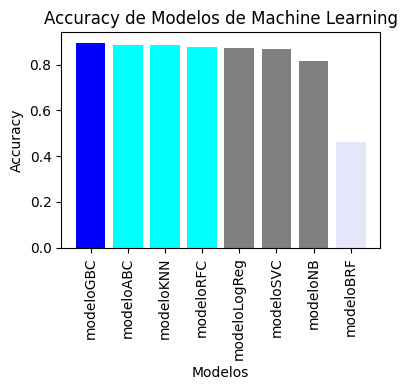

In [55]:
modelos = ["modeloRFC", "modeloGBC", "modeloABC", "modeloBRF", "modeloNB", "modeloSVC", "modeloLogReg", "modeloKNN"]
metricas = [0.8794, 0.8969, 0.8883, 0.4633, 0.8180, 0.8667, 0.8732, 0.8875]
df_metricas_combinadas = pd.DataFrame(metricas, index=modelos, columns=["Accuracy"])
df_metricas_combinadas = df_metricas_combinadas.sort_values(by="Accuracy", ascending=False)
colores = ['blue', 'cyan', 'cyan', 'cyan', 'gray', 'gray', 'gray', 'lavender']
plt.figure(figsize=(4, 4))
plt.bar(df_metricas_combinadas.index, df_metricas_combinadas["Accuracy"], color=colores)
plt.xticks(rotation=90)
plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title('Accuracy de Modelos de Machine Learning')
plt.tight_layout()
plt.show()

Accuracy: Si valoramos la precisión general del modelo para predecir correctamente las etiquetas, entonces "modeloGBC" tiene el Accuracy más alto (0.8969).

## Precisión

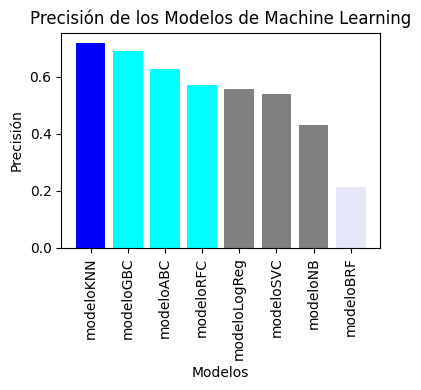

In [56]:
modelos = ["modeloRFC", "modeloGBC", "modeloABC", "modeloBRF", "modeloNB", "modeloSVC", "modeloLogReg", "modeloKNN"]
metricas = [0.5704, 0.6898, 0.6275, 0.2140, 0.4292, 0.5375, 0.5552, 0.7175]
df_metricas_combinadas = pd.DataFrame(metricas, index=modelos, columns=["Precisión"])
df_metricas_combinadas = df_metricas_combinadas.sort_values(by="Precisión", ascending=False)
colores = ['blue', 'cyan', 'cyan', 'cyan', 'gray', 'gray', 'gray', 'lavender']
plt.figure(figsize=(4, 4))
plt.bar(df_metricas_combinadas.index, df_metricas_combinadas["Precisión"], color=colores)
plt.xticks(rotation=90)
plt.xlabel('Modelos')
plt.ylabel('Precisión')
plt.title('Precisión de los Modelos de Machine Learning')
plt.tight_layout()
plt.show()

Precision: Si deseamos minimizar los falsos positivos (predecir positivo cuando es negativo), entonces "modeloKNN" tiene la Precision más alta (0.7175). Esto significa que es un buen modelo para evitar falsas alarmas.

## Recall

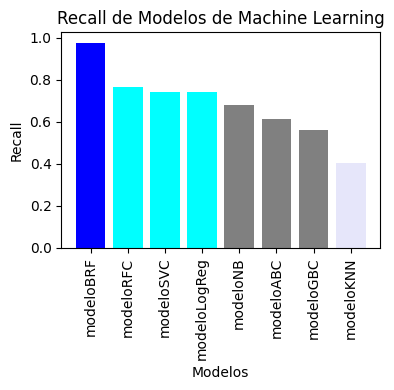

In [57]:
modelos = ["modeloRFC", "modeloGBC", "modeloABC", "modeloBRF", "modeloNB", "modeloSVC", "modeloLogReg", "modeloKNN"]
metricas = [0.7654, 0.5581, 0.6127, 0.9763, 0.6781, 0.7418, 0.7400, 0.4018]
df_metricas_combinadas = pd.DataFrame(metricas, index=modelos, columns=["Recall"])
df_metricas_combinadas = df_metricas_combinadas.sort_values(by="Recall", ascending=False)
colores = ['blue', 'cyan', 'cyan', 'cyan', 'gray', 'gray', 'gray', 'lavender']
plt.figure(figsize=(4, 4))
plt.bar(df_metricas_combinadas.index, df_metricas_combinadas["Recall"], color=colores)
plt.xticks(rotation=90)
plt.xlabel('Modelos')
plt.ylabel('Recall')
plt.title('Recall de Modelos de Machine Learning')
plt.tight_layout()
plt.show()

Recall: Si deseamos minimizar los falsos negativos (predecir negativo cuando es positivo), entonces "modeloBRF" tiene el Recall más alto (0,9763). Esto significa que es bueno para capturar todos los casos positivos.

## F1-Score

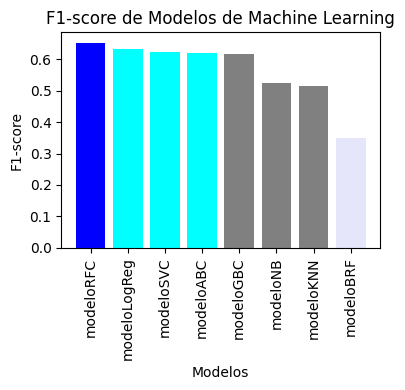

In [58]:
modelos = ["modeloRFC", "modeloGBC", "modeloABC", "modeloBRF", "modeloNB", "modeloSVC", "modeloLogReg", "modeloKNN"]
f1_scores = [0.6537, 0.6170, 0.6200, 0.3510, 0.5257, 0.6233, 0.6344, 0.5151]
df_metricas_combinadas = pd.DataFrame(f1_scores, index=modelos, columns=["F1-score"])
df_metricas_combinadas = df_metricas_combinadas.sort_values(by="F1-score", ascending=False)
colores = ['blue', 'cyan', 'cyan', 'cyan', 'gray', 'gray', 'gray', 'lavender']
plt.figure(figsize=(4, 4))
plt.bar(df_metricas_combinadas.index, df_metricas_combinadas["F1-score"], color=colores)
plt.xticks(rotation=90)
plt.xlabel('Modelos')
plt.ylabel('F1-score')
plt.title('F1-score de Modelos de Machine Learning')
plt.tight_layout()
plt.show()

F1-Score: Si buscamos un equilibrio entre Precision y Recall, entonces podríamos mirar el F1-Score: "modeloRFC" tiene un F1-Score bastante alto (0.6537).

## AUC-ROC

In [59]:
fpr_modeloRFC, tpr_modeloRFC, _ = roc_curve(y_test, modeloRFC.predict_proba(X_test)[:, 1])
roc_auc_modeloRFC = auc(fpr_modeloRFC, tpr_modeloRFC)

In [60]:
fpr_modeloGBC, tpr_modeloGBC, _ = roc_curve(y_test, modeloGBC.predict_proba(X_test)[:, 1])
roc_auc_modeloGBC = auc(fpr_modeloGBC, tpr_modeloGBC)

In [61]:
fpr_modeloABC, tpr_modeloABC, _ = roc_curve(y_test, modeloABC.predict_proba(X_test)[:, 1])
roc_auc_modeloABC = auc(fpr_modeloABC, tpr_modeloABC)

In [62]:
fpr_modeloBRF, tpr_modeloBRF, _ = roc_curve(y_test, modeloBRF.predict_proba(X_test)[:, 1])
roc_auc_modeloBRF = auc(fpr_modeloBRF, tpr_modeloBRF)

In [63]:
fpr_modeloNB, tpr_modeloNB, _ = roc_curve(y_test, modeloNB.predict_proba(X_test)[:, 1])
roc_auc_modeloNB = auc(fpr_modeloNB, tpr_modeloNB)

In [64]:
fpr_modeloLogReg, tpr_modeloLogReg, _ = roc_curve(y_test, modeloLogReg.predict_proba(X_test)[:, 1])
roc_auc_modeloLogReg = auc(fpr_modeloLogReg, tpr_modeloLogReg)

In [65]:
fpr_modeloKNN, tpr_modeloKNN, _ = roc_curve(y_test, modeloKNN.predict_proba(X_test)[:, 1])
roc_auc_modeloKNN = auc(fpr_modeloKNN, tpr_modeloKNN)

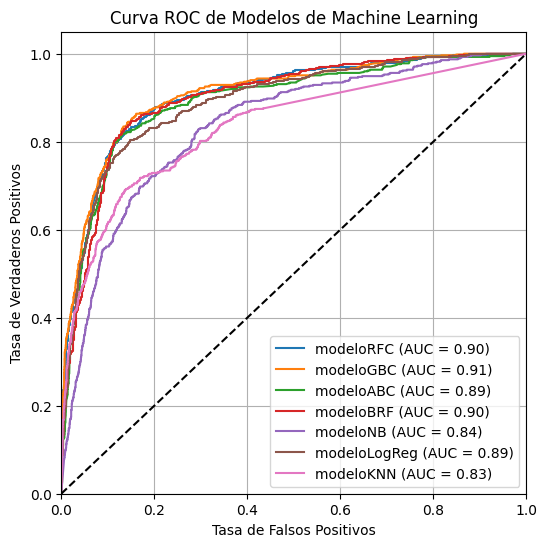

In [66]:
modelos = ["modeloRFC", "modeloGBC", "modeloABC", "modeloBRF", "modeloNB", "modeloLogReg", "modeloKNN"]
roc_curves = {
    "modeloRFC": (fpr_modeloRFC, tpr_modeloRFC),
    "modeloGBC": (fpr_modeloGBC, tpr_modeloGBC),
    "modeloABC": (fpr_modeloABC, tpr_modeloABC),
    "modeloBRF": (fpr_modeloBRF, tpr_modeloBRF),
    "modeloNB": (fpr_modeloNB, tpr_modeloNB),
    "modeloLogReg": (fpr_modeloLogReg, tpr_modeloLogReg),
    "modeloKNN": (fpr_modeloKNN, tpr_modeloKNN),}

plt.figure(figsize=(6, 6))

for modelo, (fpr, tpr) in roc_curves.items():
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{modelo} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC de Modelos de Machine Learning')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Especificidad

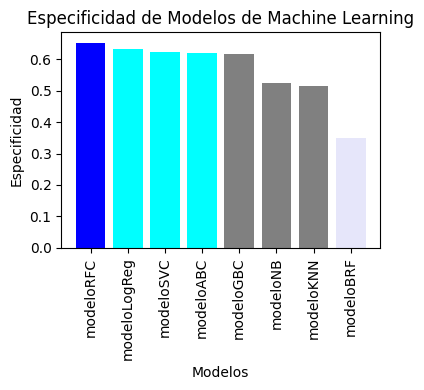

In [67]:
modelos = ["modeloRFC", "modeloGBC", "modeloABC", "modeloBRF", "modeloNB", "modeloSVC", "modeloLogReg", "modeloKNN"]
metricas = [0.8993, 0.9561, 0.9364, 0.3737, 0.8424, 0.8885, 0.8964, 0.9723]
df_metricas_combinadas = pd.DataFrame(f1_scores, index=modelos, columns=["Especificidad"])
df_metricas_combinadas = df_metricas_combinadas.sort_values(by="Especificidad", ascending=False)
colores = ['blue', 'cyan', 'cyan', 'cyan', 'gray', 'gray', 'gray', 'lavender']
plt.figure(figsize=(4, 4))
plt.bar(df_metricas_combinadas.index, df_metricas_combinadas["Especificidad"], color=colores)
plt.xticks(rotation=90)
plt.xlabel('Modelos')
plt.ylabel('Especificidad')
plt.title('Especificidad de Modelos de Machine Learning')
plt.tight_layout()
plt.show()

Especificidad: Si buscamos identificar correctamente los casos negativos, (no compradores), el mejor modelo sera modeloRFC, con un valor de 0.8993. 

# Modelo elegido ML: my_model: BalancedRandomForest

* De 8 modelos de ML probados: 1) RandomForestClassifier, 2) Gradient Boosting Classifier, 3) Ada Boost Classifier, 4)BalancedRandomForest, 5) Gaussian NB (Naive Bayes), 6) SVC, 7) Logistic Regression, 8) KNN) por la capacidad para manejar el Balance de las clases de la variable dependiente, elegimos el BalancedRandomForest.

* La métrica mas influyente tomada en cuenta es "Recall" con un valor de 0.9763. 

In [68]:
my_model = modeloRFC

## Trazabilidad

In [70]:
with mlflow.start_run():
    mlflow.set_experiment("Customer_Classification")
    mlflow.set_tag("model_type", "RandomForest")
    mlflow.sklearn.log_model(my_model, "Random_forest_model")

    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("auc_roc", roc_auc)
   

mlflow.end_run()

In [71]:
ruta_guardado = r"C:\Users\axa\THE BRIDGE_23\SEMANA 24. CORE. PROYECTO ML\81. PROYECTO ML\src\model/"
nombre_archivo = 'my_model.joblib'
ruta_completa = ruta_guardado + nombre_archivo
joblib.dump(my_model, ruta_completa)

['C:\\Users\\axa\\THE BRIDGE_23\\SEMANA 24. CORE. PROYECTO ML\\81. PROYECTO ML\\src\\model/my_model.joblib']